In [1]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical # to convert one hot encoding
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
#loading data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape

(42000, 785)

In [4]:
train_data.shape

(42000, 785)

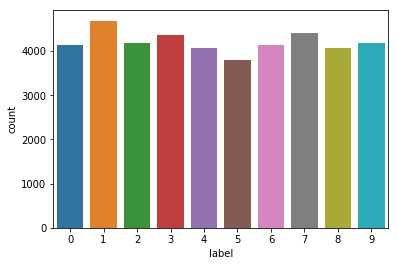

In [5]:
Y_train = train_data['label']
#Y_train.value_counts().plot.bar()
sns.countplot(Y_train)
X_train = train_data.drop('label',axis = 1)
del train_data

In [6]:
#Normalisation

X_train = X_train/255.0
test_data = test_data/255.0
type(X_train)

pandas.core.frame.DataFrame

In [7]:
#reshape
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
type(X_train)

numpy.ndarray

In [8]:
#label
Y_train = to_categorical(Y_train,num_classes = 10)

In [9]:
#spliting training and testing data
random_seed = 2
X_train,test_X,Y_train,test_Y = train_test_split(X_train,Y_train,test_size = 0.1,random_state = random_seed)
type(X_train)

numpy.ndarray

In [10]:
# Part 1 - Building the CNN

# Initialising the CNN
classifier = Sequential()


# Step 1 - Convolution
classifier.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation = 'relu'))



# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Repeating Step ! and 2
# Step 1 - Convolution
classifier.add(Conv2D(256, (3, 3), input_shape = (28,28,1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 1 - Convolution
classifier.add(Conv2D(512, (3, 3), input_shape = (28,28,1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())


# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))


classifier.add(Dense(units = 10, activation = 'softmax'))


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
classifier.fit(x = X_train,y = Y_train,batch_size =2000,epochs = 10,validation_data=(test_X,test_Y))

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 540s 14ms/step - loss: 1.4195 - acc: 0.5354 - val_loss: 0.6953 - val_acc: 0.7829
Epoch 2/10
37800/37800 [==============================] - 581s 15ms/step - loss: 0.4612 - acc: 0.8581 - val_loss: 0.3257 - val_acc: 0.8974
Epoch 3/10
37800/37800 [==============================] - 568s 15ms/step - loss: 0.2534 - acc: 0.9218 - val_loss: 0.2147 - val_acc: 0.9312
Epoch 4/10
37800/37800 [==============================] - 565s 15ms/step - loss: 0.1743 - acc: 0.9457 - val_loss: 0.1694 - val_acc: 0.9481
Epoch 5/10
37800/37800 [==============================] - 569s 15ms/step - loss: 0.1383 - acc: 0.9578 - val_loss: 0.1522 - val_acc: 0.9562
Epoch 6/10
37800/37800 [==============================] - 566s 15ms/step - loss: 0.1190 - acc: 0.9636 - val_loss: 0.1217 - val_acc: 0.9602
Epoch 7/10
37800/37800 [==============================] - 566s 15ms/s

In [ ]:

result = classifier.predict(test_data)
result = np.argmax(result,axis = 1)
result = pd.DataFrame(result)
result = result.rename(columns={0: 'Label'})
sample_submission = pd.read_csv('sample_submission.csv')

ImageId = pd.Series(range(1,28001),name = 'ImageId')
submission = pd.concat([ImageId,result],axis = 1)
submission.to_csv('submission.csv',index = False)

submission